In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('bulletLowRatingData.csv')
chessdata['Opening_new'].describe()


count                13210
unique                  88
top       Sicilian Defense
freq                  1171
Name: Opening_new, dtype: object

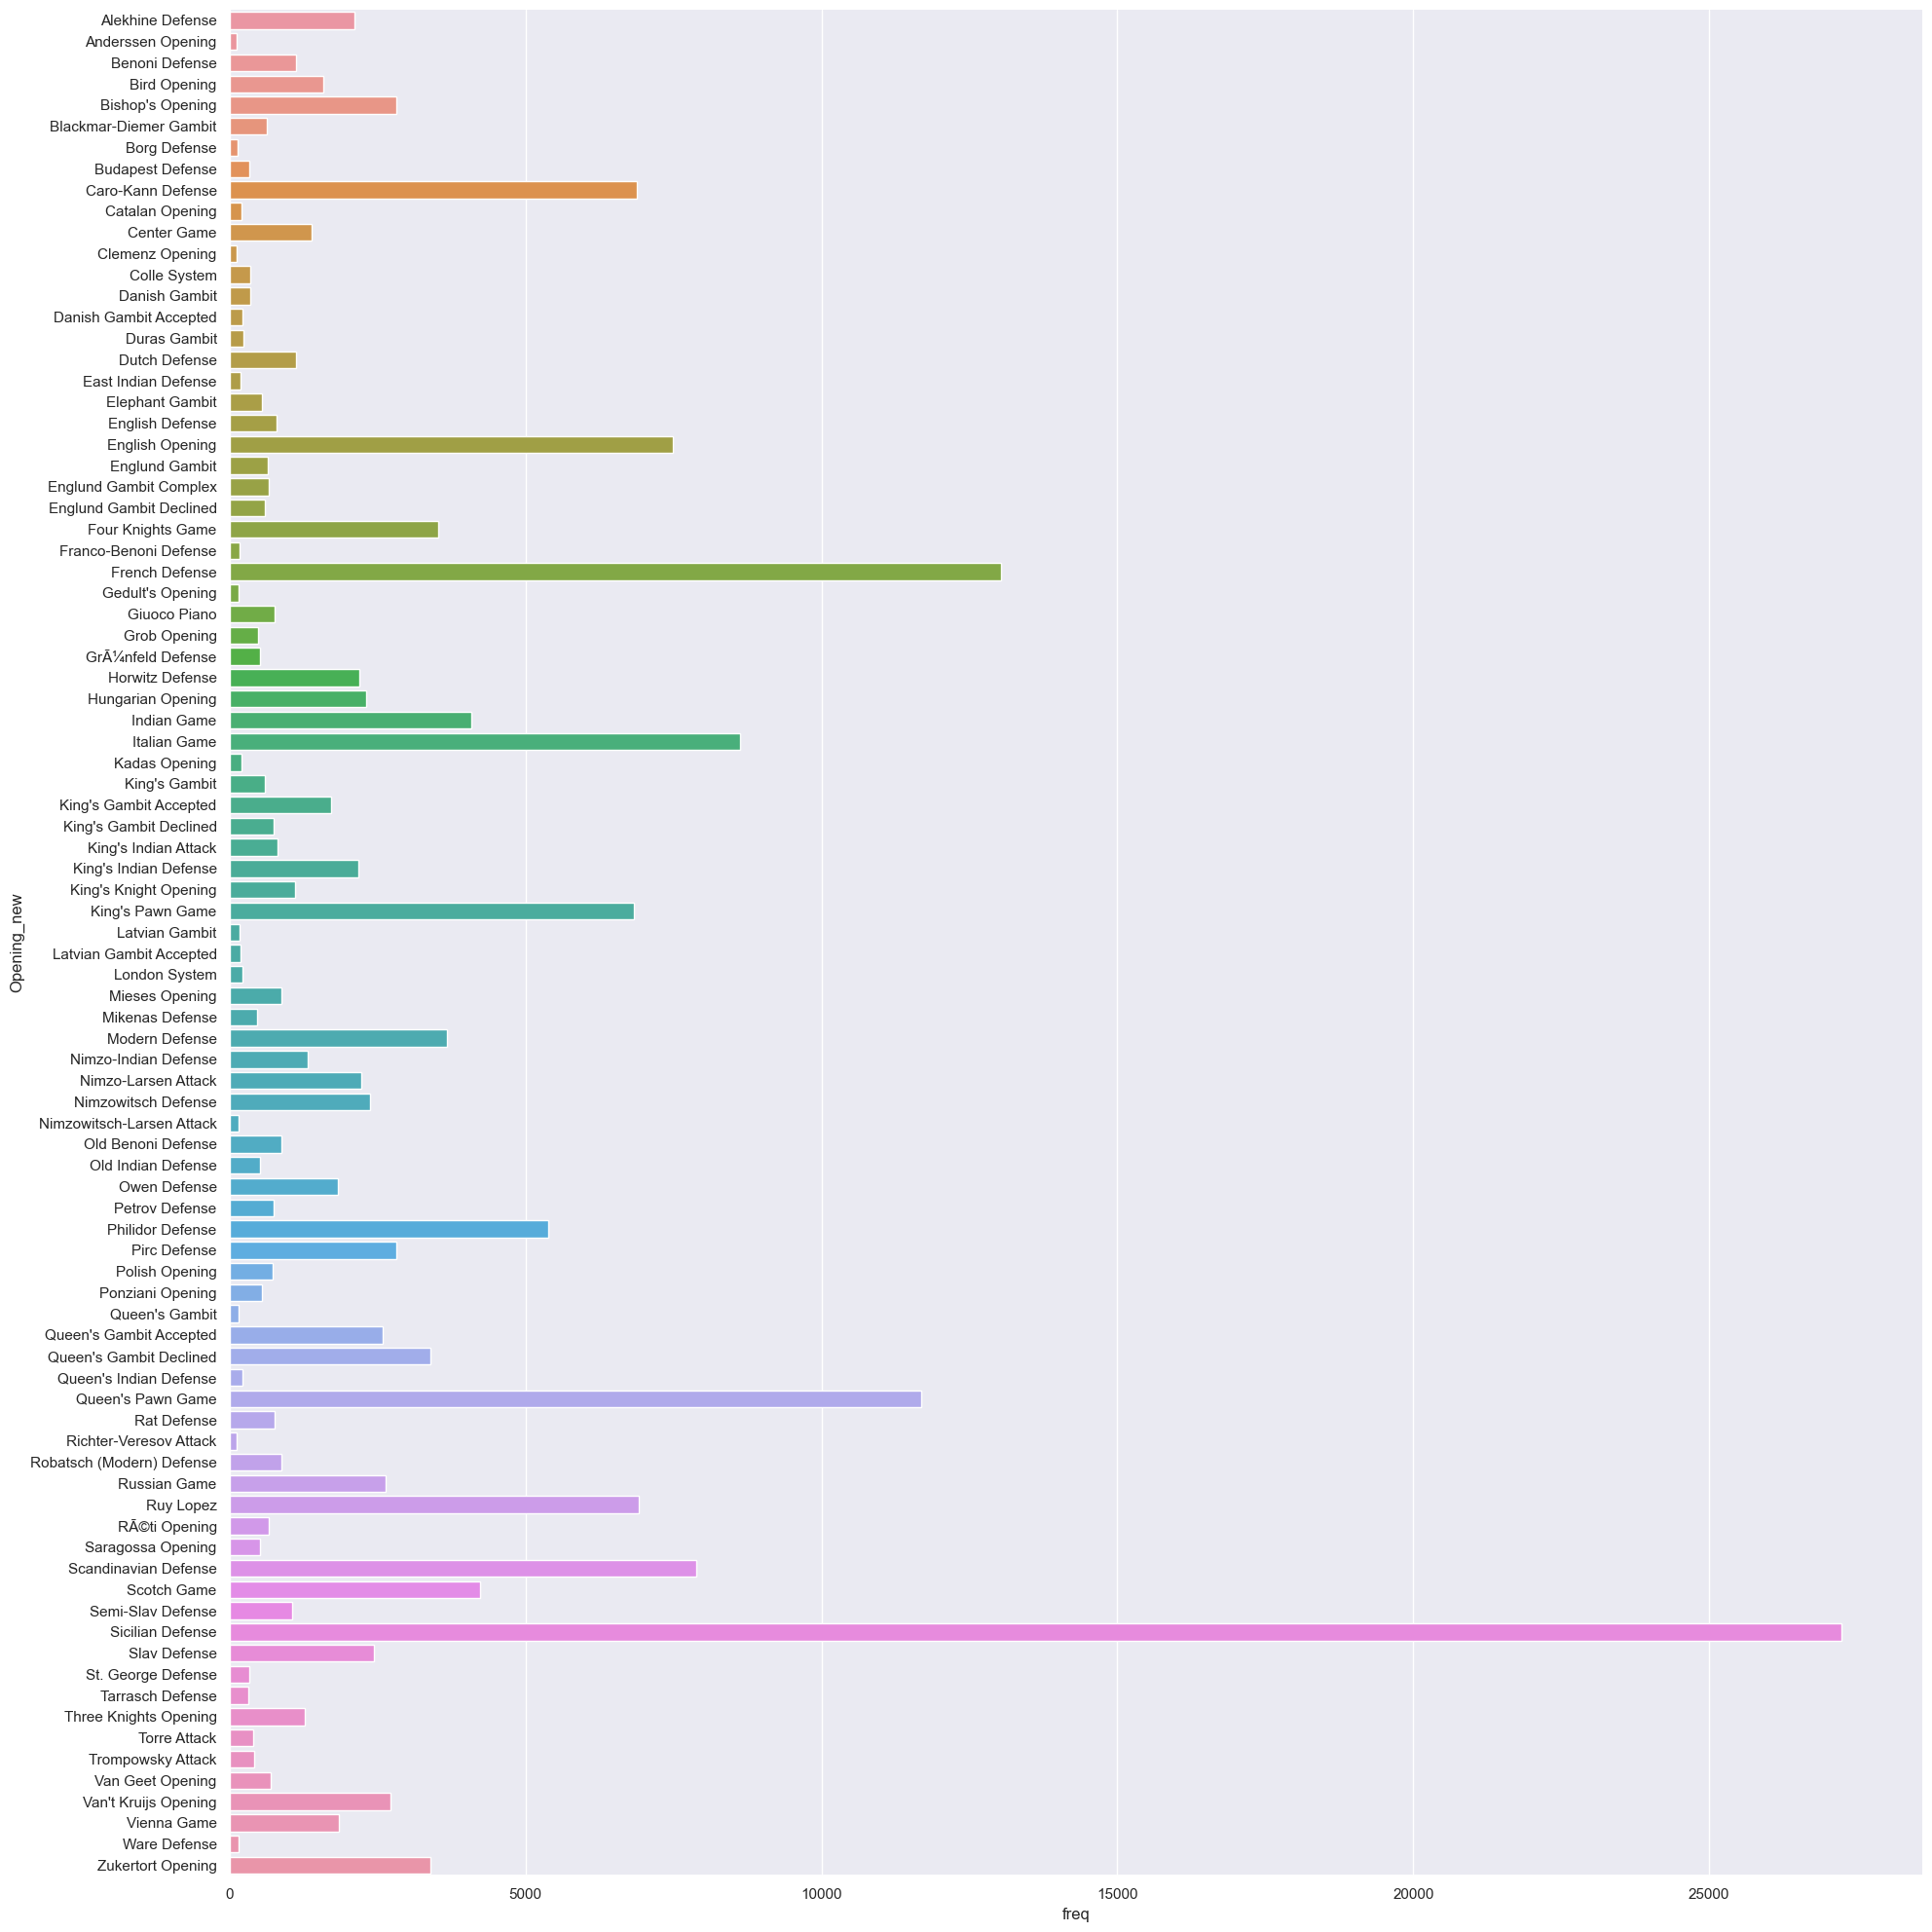

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_26268\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_26268\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
3531,GrÃ¼nfeld Defense,5,0,0.0
2155,East Indian Defense,8,2,0.25
923,Torre Attack,14,4,0.285714
381,Colle System,25,8,0.32
278,Giuoco Piano,37,12,0.324324
...,...,...,...,...
44,Duras Gambit,27,17,0.62963
1307,Queen's Gambit,15,11,0.733333
1237,Richter-Veresov Attack,6,5,0.833333
3527,Nimzowitsch-Larsen Attack,2,2,1.0


Win rate for white

In [6]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
86,Nimzo-Larsen Attack,179,70,0.391061
19,Indian Game,152,60,0.394737
21,Van't Kruijs Opening,329,130,0.395137
5,Hungarian Opening,265,113,0.426415
188,Horwitz Defense,181,82,0.453039
20,Three Knights Opening,118,55,0.466102
7,Sicilian Defense,1171,549,0.46883
10,Vienna Game,165,78,0.472727
117,Scotch Game,246,117,0.47561
32,Caro-Kann Defense,275,131,0.476364


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_26268\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_26268\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
4169,Catalan Opening,3,0,0.0
3527,Nimzowitsch-Larsen Attack,2,0,0.0
1237,Richter-Veresov Attack,6,1,0.166667
1307,Queen's Gambit,15,3,0.2
1446,Trompowsky Attack,16,5,0.3125
...,...,...,...,...
147,Benoni Defense,50,32,0.64
381,Colle System,25,17,0.68
923,Torre Attack,14,10,0.714286
2155,East Indian Defense,8,6,0.75


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
25,Nimzowitsch Defense,224,94,0.419643
48,Pirc Defense,164,72,0.439024
11,Alekhine Defense,174,77,0.442529
358,Mieses Opening,128,57,0.445312
34,Russian Game,217,98,0.451613
98,Philidor Defense,380,173,0.455263
252,Slav Defense,110,51,0.463636
12,Ruy Lopez,332,154,0.463855
16,English Opening,354,165,0.466102
15,Scandinavian Defense,675,316,0.468148


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13210 entries, 0 to 13209
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    13210 non-null  int64  
 1   BlackElo      13210 non-null  int64  
 2   ECO           13210 non-null  object 
 3   Event         13210 non-null  object 
 4   Opening       13210 non-null  object 
 5   Result        13210 non-null  object 
 6   Termination   13210 non-null  object 
 7   TimeControl   13210 non-null  object 
 8   WhiteElo      13210 non-null  int64  
 9   BlackTitle    0 non-null      float64
 10  WhiteTitle    0 non-null      float64
 11  Move_ply_200  1 non-null      object 
 12  Category      13210 non-null  object 
 13  Opening_new   13210 non-null  object 
 14  freq          13210 non-null  int64  
 15  ELO Diff      13210 non-null  int64  
 16  Ave ELO       13210 non-null  float64
 17  tot           13210 non-null  int64  
dtypes: float64(3), int64(6), o

In [13]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [14]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5848383259435492

Test Data
Accuracy  :	 0.5571536714610144



[Text(0.4991319444444444, 0.9285714285714286, 'ELO Diff <= -0.5\ngini = 0.51\nsamples = 9247\nvalue = [4519, 94, 4634]\nclass = White'),
 Text(0.2690972222222222, 0.7857142857142857, 'ELO Diff <= -121.5\ngini = 0.499\nsamples = 4564\nvalue = [2598, 48, 1918]\nclass = Black'),
 Text(0.16319444444444445, 0.6428571428571429, 'Opening_new_Van Geet Opening <= 0.5\ngini = 0.441\nsamples = 892\nvalue = [607, 9, 276]\nclass = Black'),
 Text(0.10416666666666667, 0.5, 'ELO Diff <= -212.5\ngini = 0.437\nsamples = 884\nvalue = [606, 8, 270]\nclass = Black'),
 Text(0.05555555555555555, 0.35714285714285715, 'Opening_new_Zukertort Opening <= 0.5\ngini = 0.381\nsamples = 289\nvalue = [216, 2, 71]\nclass = Black'),
 Text(0.027777777777777776, 0.21428571428571427, 'Opening_new_Bird Opening <= 0.5\ngini = 0.371\nsamples = 284\nvalue = [215, 2, 67]\nclass = Black'),
 Text(0.013888888888888888, 0.07142857142857142, 'gini = 0.366\nsamples = 282\nvalue = [215, 2, 65]\nclass = Black'),
 Text(0.041666666666666

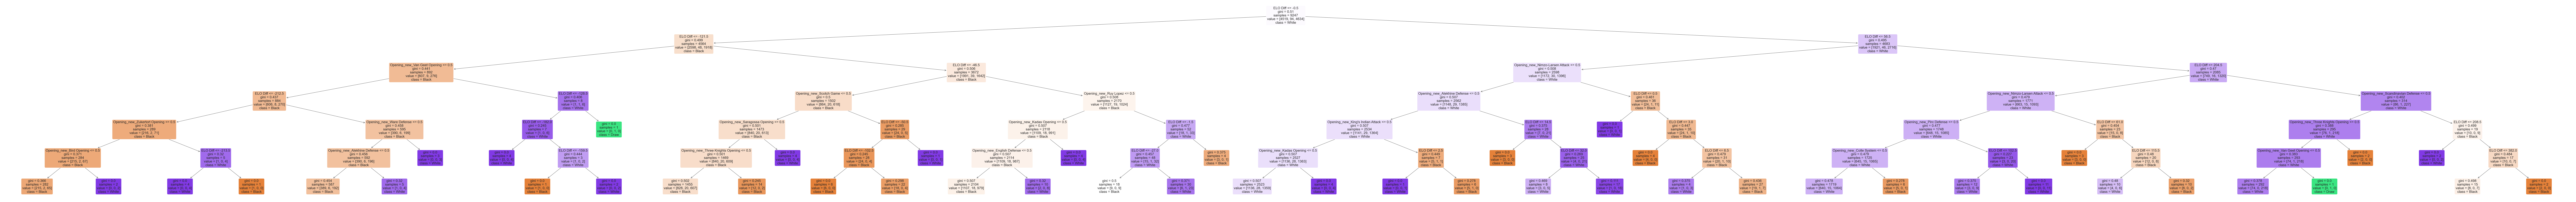

In [15]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

![The Philidor Defence](lowphoto/left.png "Title")

![The Philidor Defence](lowphoto/mid.png "Title")

![The Philidor Defence](lowphoto/right.png "Title")